In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from astsadata import *

/mnt/d/work/tsa4-python/.venv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


# Section 1.2 Time Series Statistical Models

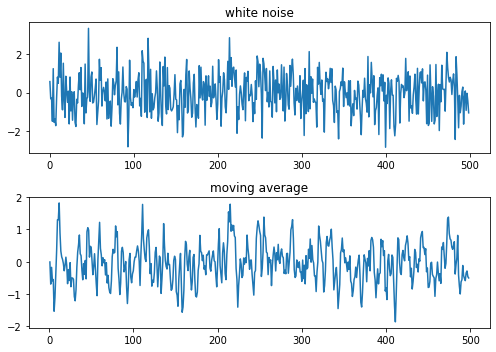

In [2]:
# Example 1.9
w = np.random.normal(loc=0, scale=1, size=500)
v = sm.tsa.filters.convolution_filter(w, filt=np.repeat(1/3, 3), nsides=2) # moving average

fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
axes[0].plot(w)
axes[0].set_title("white noise")
axes[1].plot(v)
axes[1].set_title("moving average")
fig.tight_layout()
plt.show()

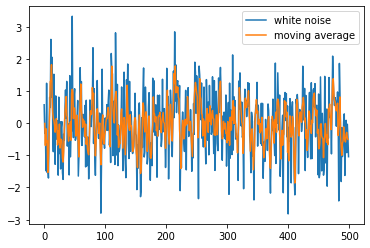

In [3]:
# now try this (not in text)
plt.plot(w, label="white noise")
plt.plot(v, label="moving average")
plt.legend()
plt.show()

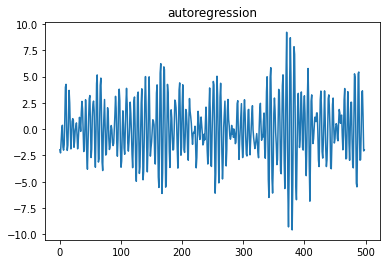

In [4]:
# Example 1.10
w = np.random.normal(loc=0, scale=1, size=550) # 50 extra to avoid startup problems
x = sm.tsa.filters.recursive_filter(w, ar_coeff=np.array([1, -.9]))[51:]

plt.plot(x)
plt.title("autoregression")
plt.show()

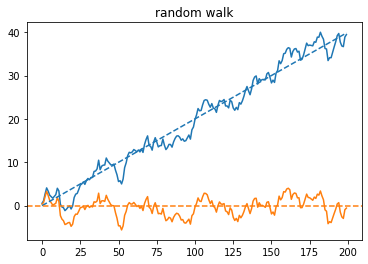

In [5]:
# Example 1.11
np.random.seed(444) # so you can reproduce the results
w = np.random.normal(size=200)
x = np.cumsum(w)
wd = w + .2
xd = np.cumsum(wd)

plt.plot(xd)
plt.plot(x)
x = np.arange(0, 200)
plt.plot(x, .2 * x, color="#1f77b4", linestyle="--")
plt.axhline(y=0, color="#ff7f0e", linestyle="--")
plt.title("random walk")
plt.show()

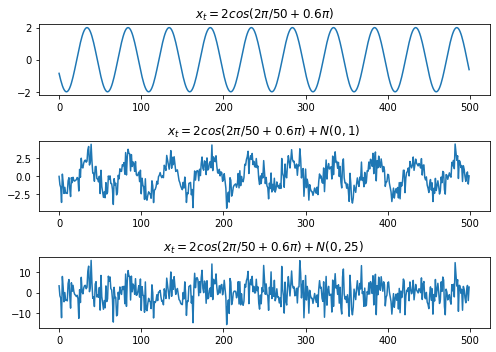

In [6]:
# Example 1.12
cs = 2 * np.cos(2 * np.pi * np.arange(1, 501) / 50 + .6 * np.pi)
w = np.random.normal(size=500)

fig, axes = plt.subplots(nrows=3, figsize=(7, 5))
axes[0].plot(cs)
axes[0].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi)$")
axes[1].plot(cs + w)
axes[1].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi) + N(0, 1)$")
axes[2].plot(cs + 5 * w)
axes[2].set_title(r"$x_{t} = 2cos(2\pi / 50 + 0.6\pi) + N(0, 25)$")
fig.tight_layout()
plt.show()